In [1]:
import os
os.chdir('../')

In [2]:
import DeepPurpose.oneliner as oneliner
from DeepPurpose import dataset

In [3]:
target, target_name = dataset.load_SARS_CoV_Protease_3CL()
train_drug, train_target, train_y = dataset.load_AID1706_SARS_CoV_3CL('./data', seed = 1234)
X_repurpose, drug_names, drug_CID = dataset.load_antiviral_drugs('./data')

Beginning Processing...


/home/kh278/.conda/envs/DeepPurpose/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kh278/DeepPurpose/dataset.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['binary_label'][(val.PUBCHEM_ACTIVITY_SCORE >= threshold) & (val.PUBCHEM_ACTIVITY_SCORE <=100)] = 1


Default binary threshold for the binding affinity scores is 15, recommended by the investigator
Done!


In [4]:
len(train_drug)

26640

In [5]:
target

'SGFKKLVSPSSAVEKCIVSVSYRGNNLNGLWLGDSIYCPRHVLGKFSGDQWGDVLNLANNHEFEVVTQNGVTLNVVSRRLKGAVLILQTAVANAETPKYKFVKANCGDSFTIACSYGGTVIGLYPVTMRSNGTIRASFLAGACGSVGFNIEKGVVNFFYMHHLELPNALHTGTDLMGEFYGGYVDEEVAQRVPPDNLVTNNIVAWLYAAIISVKESSFSQPKWLESTTVSIEDYNRWASDNGFTPFSTSTAITKLSAITGVDVCKLLRTIMVKSAQWGSDPILGQYNFEDELTPESVFNQVGGVRLQ'

In [6]:
len(X_repurpose)

82

Loading customized repurposing dataset...
Beginning Downloading Configs Files for training from scratch...
Configs Models Successfully Downloaded...
Training on your own customized data...
in total: 26640 drug-target pairs
encoding drug...
unique drugs: 13763
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.
Training from scrtach...
Begin to train model 0 with drug encoding MPNN and target encoding CNN
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69219315. Total time 0.0005555555555555556 hours
Training at Epoch 1 iteration 100 with loss 0.63622105. Total time 0.014444444444444444 hours
Validation at Epoch 1 , AUROC: 0.7087283425956196 , AUPRC: 0.08107097908058133 , F1: 0.0906515580736544
Training at Epoch 2 iteration 0 with loss 0.61612177. Total time 0.024722222222222222 hours
Training at Epoch 2 iteration 100 with loss 0.50596976. Total time 

Validation at Epoch 1 , AUROC: 0.7313664596273293 , AUPRC: 0.23058463219304937 , F1: 0.29508196721311475
Training at Epoch 2 iteration 0 with loss 0.079783715. Total time 0.013333333333333334 hours
Training at Epoch 2 iteration 100 with loss 0.016180238. Total time 0.020555555555555556 hours
Validation at Epoch 2 , AUROC: 0.7525661981039555 , AUPRC: 0.23391751042389253 , F1: 0.271604938271605
Training at Epoch 3 iteration 0 with loss 0.012072997. Total time 0.026111111111111113 hours
Training at Epoch 3 iteration 100 with loss 0.03480403. Total time 0.03361111111111111 hours
Validation at Epoch 3 , AUROC: 0.7688460281137626 , AUPRC: 0.21905220874917747 , F1: 0.2898550724637681
Training at Epoch 4 iteration 0 with loss 0.0010851969. Total time 0.03916666666666667 hours
Training at Epoch 4 iteration 100 with loss 0.00019589432. Total time 0.04694444444444444 hours
Validation at Epoch 4 , AUROC: 0.7284406668846028 , AUPRC: 0.23466079919073313 , F1: 0.34375
Training at Epoch 5 iteration 0 

Training at Epoch 3 iteration 0 with loss 0.13126822. Total time 0.009166666666666667 hours
Training at Epoch 3 iteration 100 with loss 0.0379384. Total time 0.011666666666666667 hours
Validation at Epoch 3 , AUROC: 0.7335894083033672 , AUPRC: 0.2647095331218357 , F1: 0.2888888888888889
Training at Epoch 4 iteration 0 with loss 0.0031825094. Total time 0.01361111111111111 hours
Training at Epoch 4 iteration 100 with loss 0.0047529517. Total time 0.01611111111111111 hours
Validation at Epoch 4 , AUROC: 0.7211670480549198 , AUPRC: 0.18336171202127227 , F1: 0.3
Training at Epoch 5 iteration 0 with loss 0.0057531577. Total time 0.018333333333333333 hours
Training at Epoch 5 iteration 100 with loss 0.002326008. Total time 0.020833333333333332 hours
Validation at Epoch 5 , AUROC: 0.7077639751552794 , AUPRC: 0.20202756677960382 , F1: 0.2597402597402597
Training at Epoch 6 iteration 0 with loss 0.04005599. Total time 0.02277777777777778 hours
Training at Epoch 6 iteration 100 with loss 0.00133

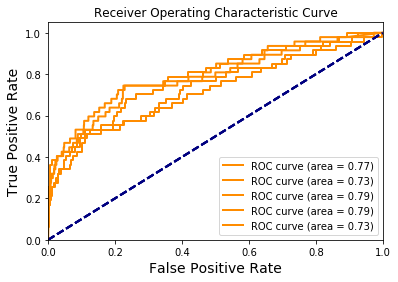

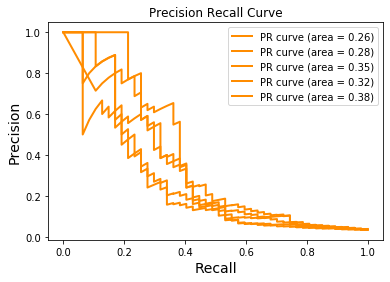

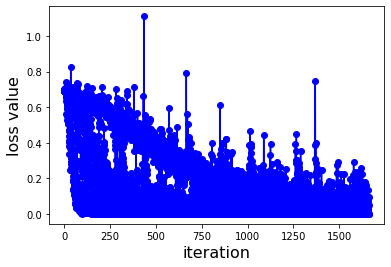

In [7]:
oneliner.repurpose(target = target, 
                    target_name = target_name, 
                    train_drug = train_drug,
                    train_target = train_target,
                    train_y = train_y,
                    X_repurpose = X_repurpose,
                    drug_names = drug_names,
                    save_dir = './save_folder',
                    finetune_batch_size = 128,
                    finetune_LR = 0.001,
                    finetune_epochs=10,
                    split='HTS',
                    convert_y = False,
                    frac=[0.8,0.1,0.1],
                    pretrained = False,
                    agg = 'max_effect')